<a href="https://colab.research.google.com/github/theaok/vis/blob/main/ols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm

## basic ols regression

REFS:

TODO:<br>

https://github.com/jcarpenter12/Regression-Analysis-Using-Python

https://github.com/mzalaya/regression-analysis-with-python/tree/master

<br>
technical

https://www.statsmodels.org/stable/regression.html

https://www.statsmodels.org/dev/examples/index.html#plotting

https://scikit-learn.org/stable/modules/linear_model.html

https://www.scikit-yb.org/en/latest/index.html
<br><br>

visual, lets skim through:

https://seaborn.pydata.org/tutorial/regression.html






In [ ]:
auto=pd.read_stata('https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download')
auto.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price,74.0,6165.26,2949.50,3291.00,4220.25,5006.50,6332.25,15906.00
mpg,74.0,21.30,5.79,12.00,18.00,20.00,24.75,41.00
rep78,69.0,3.41,0.99,1.00,3.00,3.00,4.00,5.00
headroom,74.0,2.99,0.85,1.50,2.50,3.00,3.50,5.00
trunk,74.0,13.76,4.28,5.00,10.25,14.00,16.75,23.00
weight,74.0,3019.46,777.19,1760.00,2250.00,3190.00,3600.00,4840.00
length,74.0,187.93,22.27,142.00,170.00,192.50,203.75,233.00
turn,74.0,39.65,4.40,31.00,36.00,40.00,43.00,51.00
displacement,74.0,197.30,91.84,79.00,119.00,196.00,245.25,425.00
gear_ratio,74.0,3.01,0.46,2.19,2.73,2.96,3.35,3.89


In [ ]:
result = sm.ols(formula="price ~ mpg + rep78 + turn + gear_ratio", data=auto).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     6.066
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           0.000334
Time:                        20:18:15   Log-Likelihood:                -636.71
No. Observations:                  69   AIC:                             1283.
Df Residuals:                      64   BIC:                             1295.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.174e+04   7306.103      1.607      0.1

In [ ]:
#and can plot coefs; first get them as table
c=pd.read_html(result.summary().as_html(),header =0)[1][1:] #drop cons-ya could just skip intercept and coefs that are not super interesting and or way bigger/smaller than the most interesting ones, it would throw off the picture
c=c.iloc[::-1]
c

,Unnamed: 0,coef,std err,t,P>|t|,[0.025,0.975]
4,gear_ratio,-1309.2543,985.443,-1.329,0.189,-3277.903,659.395
3,turn,3.5885,118.021,0.030,0.976,-232.185,239.362
2,rep78,777.5430,362.774,2.143,0.036,52.818,1502.268
1,mpg,-209.3601,81.603,-2.566,0.013,-372.381,-46.340


<ErrorbarContainer object of 3 artists>

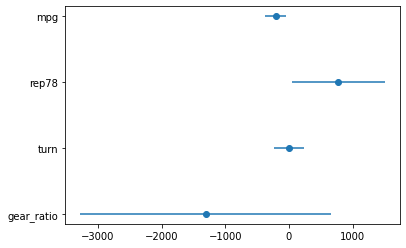

In [ ]:
x_error = ( c['0.975]'] - c['[0.025'] ) / 2
plt.errorbar(c.coef,c['Unnamed: 0'],
             xerr = x_error,
             fmt ='o')
#TODO have dashed vert line at 0

## elaboration [skip]

based on:
https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%204%20-%20Regression%20and%20Prediction.ipynb

can get a textbook 'practical stats for data scientists' (i did)

In [ ]:
!pip install pygam
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 58.5 MB/s eta 0:00:00


In [ ]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

from pygam import LinearGAM, s, l
from pygam.datasets import wage


import seaborn as sns
import matplotlib.pyplot as plt

from dmba import stepwise_selection
from dmba import AIC_score

%matplotlib inline

In [ ]:
house = pd.read_csv('https://github.com/gedeck/practical-statistics-for-data-scientists/raw/master/data/house_sales.csv',sep='\t')

In [ ]:
house.dtypes

DocumentDate        object
SalePrice            int64
PropertyID           int64
PropertyType        object
ym                  object
zhvi_px              int64
zhvi_idx           float64
AdjSalePrice       float64
NbrLivingUnits       int64
SqFtLot              int64
SqFtTotLiving        int64
SqFtFinBasement      int64
Bathrooms          float64
Bedrooms             int64
BldgGrade            int64
YrBuilt              int64
YrRenovated          int64
TrafficNoise         int64
LandVal              int64
ImpsVal              int64
ZipCode              int64
NewConstruction       bool
dtype: object

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:59:35   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694

# old [skip]

In [ ]:
#example of age and fear from slides; not results little different
#as i had sligtly different input numbers
import pandas as pd
import statsmodels.formula.api as sm
df = pd.DataFrame({"age": [23,38,48,57,72], "fear": [2,6,6,14,11]})
result = sm.ols(formula="fear ~ age", data=df).fit()
print(result.summary())

#vis reg line as fit on scatter plot, esp by group and with CI https://seaborn.pydata.org/tutorial/regression.html
#definitely play with coefplot https://stackoverflow.com/questions/28642360/coefficient-plot-in-python

#from statsmodels partial reg plot and influence plots look good https://www.statsmodels.org/stable/examples/notebooks/generated/regression_plots.html
#and check out cool examples for more advanced models https://www.statsmodels.org/stable/examples/index.html#plotting
#nice overview for beginners https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python



                            OLS Regression Results                            
Dep. Variable:                   fear   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     7.432
Date:                Fri, 24 Feb 2023   Prob (F-statistic):             0.0722
Time:                        13:32:04   Log-Likelihood:                -11.171
No. Observations:                   5   AIC:                             26.34
Df Residuals:                       3   BIC:                             25.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3872      3.958     -0.603      0.5

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
# wages example: fist download the dataset from:
# https://sites.google.com/site/adamokuliczkozaryn/adv_reg/wages.csv
# then uplodad to the colab:
# click folder on the right toolbar and upload the file to sampple_data
#df = pd.read_csv('sample_data/wages.csv') #read data
# or:
df = pd.read_csv('https://sites.google.com/site/adamokuliczkozaryn/adv_reg/wages.csv')
df.dtypes #have a look

Unnamed: 0      int64
wage          float64
educ            int64
exp             int64
union          object
nonwhite       object
hispanic       object
female         object
married        object
south          object
_est_logit      int64
dtype: object

In [ ]:
df.head(10) #print the first 10 obs

,Unnamed: 0,wage,educ,exp,union,nonwhite,hispanic,female,married,south,_est_logit
0,0,4.9998,12,4,no,no,no,male,no,yes,1
1,1,17.2500,18,5,no,no,no,male,yes,no,1
2,2,9.8601,15,13,no,no,no,male,yes,no,1
3,3,14.9990,12,39,yes,no,no,male,yes,no,1
4,4,4.0000,12,4,no,no,no,male,no,no,1
5,5,14.0010,11,13,yes,no,no,male,yes,no,1
6,6,16.4250,14,19,no,no,no,male,no,no,1
7,7,10.5000,12,4,yes,no,no,male,yes,no,1
8,8,20.5510,12,33,no,no,no,male,yes,no,1
9,9,6.5000,12,5,no,no,no,male,no,yes,1


In [ ]:
df[['wage','educ','exp']].describe()

,wage,educ,exp
count,534.000000,534.000000,534.000000
mean,9.023939,13.018727,17.822097
std,5.138876,2.615373,12.379710
min,1.000000,2.000000,0.000000
25%,5.249900,12.000000,8.000000
50%,7.778000,12.000000,15.000000
75%,11.250000,15.000000,26.000000
max,44.500000,18.000000,55.000000


In [ ]:
df.corr().round(2)

,Unnamed: 0,wage,educ,exp,_est_logit
Unnamed: 0,1.00,-0.18,-0.03,0.11,NaN
wage,-0.18,1.00,0.38,0.09,NaN
educ,-0.03,0.38,1.00,-0.35,NaN
exp,0.11,0.09,-0.35,1.00,NaN
_est_logit,NaN,NaN,NaN,NaN,NaN


In [ ]:
result = sm.ols(formula="wage ~ educ + exp + married", data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     45.45
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           3.78e-26
Time:                        15:24:30   Log-Likelihood:                -1570.2
No. Observations:                 534   AIC:                             3148.
Df Residuals:                     530   BIC:                             3165.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.0704      1.225     -4.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


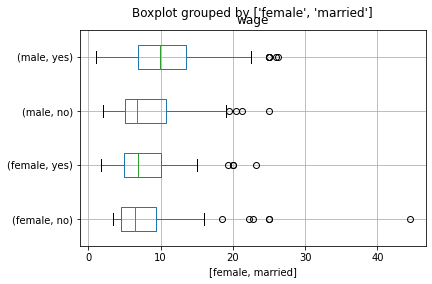

In [ ]:
df.boxplot(column='wage',by=['female','married'],vert=False)

# 3d
there was somewhere, probably plotly nice vis of 3d surface/plane (curved tho) with scatter to nicely vis 3 var reg

# regression trees

see py/dat_anal/The Only Guide You Need to Understand Regression Trees _ by Dominik Polzer _ Towards Data Science.pdf

# survival analysis

nice!!
https://towardsdatascience.com/hands-on-survival-analysis-with-python-270fa1e6fb41